# Токенизация текстов в деталях

## TF-IDF

**Term Frequency-Inverse Document Frequency**

Каждый вектор будет характеризовать соответствующий документ на основе встречаемости слов, а каждый элемент вектора — соответствовать какому-то слову из словаря слов всего корпуса. 

Получается матрица размерности `Число документов × Число слов в документах`. Каждому слову присвоен счётчик. Чем ближе число в ячейке к 0, тем менее важно слово в контексте этого документа. `tf-idf = 0` означает, что слово не встречается в тексте вообще.

$$
TFIDF = TF * IDF
$$

$$
TF = \frac{WordCount(w,d)}{Length(d)}
$$

$$
IDF(w,C) = lg\frac{Size(C)}{DocCount(w, C)}
$$

- TF, Term Frequency — частота слова в конкретном документе.

- IDF, Inverse Document Frequency — обратная частота встречаемости слова среди документов.
  
- TFIDF — число, описывающее важность отдельно взятого слова для конкретного документа.

- DocCount — число документов в корпусе С, где встречается слово w;
    
- Size(С) — общее число документов в корпусе C.

Вернёмся к примеру с генетикой. Пусть есть 20 документов про генетику и в каждом из них употребили слово «ген» по 1 разу. При этом слово «мышь» употребили только в одном документе (X) из 1000 слов. Посчитаем для документа X TF_IDF для слов «мышь» и «ген»:
```
TF_ген = 1 / 1000 = 0.001
TF_мышь = 1 / 1000 = 0.001

IDF_ген = log(20 / 20) = 0
IDF_мышь = log(20 / 1) =~ 1.301


TF_IDF_ген = 0.001 * 0 = 0
TF_IDF_мышь = 0.001 * 1.301 = 0.001301
```
Если слово не характерно для корпуса текстов, то, скорее всего, на него стоит обратить больше внимания.

В более общем случае метод TF-IDF работает не только с отдельными словами, но и с n-gram'ами:

***N-gram — последовательность из N-символов или слов, идущих по порядку, получаемых путём токенизации. Словарь в TF-IDF будет состоять из N-gram***

Пример:
```
text = 'мама мыла раму'

# 1-gram, по словам ИЛИ  word-level токенизация
'мама', мыла', 'раму' # единица словаря в этом случае - 1 слово

# 2-gram, по словам
'мама мыла', 'мыла раму' # единица словаря - 2 слова

# 2-gram, посимвольно или  character-level токенизация
'ма', 'ам', 'а ', ' м', 'мы', 'ыл', 'ла', ' р', 'ра', 'му' # обратите внимание на пробелы в составе n-gram 
```

## Предобработка корпуса текстов:

Задача токенизации — разбить текст на отдельные элементы, которые в дальнейшем будут использованы для анализа. Алгоритмами, выполняющими разбиение, то есть токенизаторами, могут быть:

- Регулярные выражения.
   
- Предобученные словари, построенные на большом количестве документов и выучившие наиболее частотное для конкретного языка совместное расположение символов в текстах.

Предобученные токенизаторы включены во многие библиотеки по работе с естественным языком, такие как NLTK (Natural Language ToolKit), spacy и transformers из экосистемы huggingface. 

In [1]:
from collections import Counter
import re

from ml_dl_experiments import settings

with open(settings.SOURCE_PATH + "datasets/tiny_shakespear.txt", "r") as f:
    text = f.read()

text[:60]

'First Citizen:\nBefore we proceed any further, hear me speak.'

In [2]:
# регулярное выражение - оставляет только слова длиной  > 1 символа без пунктуации
pattern = r"(?u)\b\w\w+\b"

re.findall(pattern, text[:60])

['First',
 'Citizen',
 'Before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak']

Токенизируем этот же фрагмент с помощью разных библиотек и сравним результаты. Используем библиотеки NLTK, transformers, а также библиотеку spacy:

In [10]:
import spacy
from nltk import word_tokenize
from transformers import AutoTokenizer
import nltk

# для некоторых библиотек требуется ручной вызов загрузки
# необходимых словарей, модулей. 
nltk.download('punkt')
nltk.download('punkt_tab')

# для spacy загрузим отдельную модель/словарь для английского языка en_core_web_sm    
nlp = spacy.load(settings.SOURCE_PATH + "ml_dl/models/en_core_web_sm-3.8.0")

# в transformers используем предобученный токенизатор от модели для английского языка
tokenizer = AutoTokenizer.from_pretrained(settings.SOURCE_PATH + "ml_dl/models/distilbert-base-uncased-distilled-squad")

#в nltk указываем язык, с которым работаем явно
tokens_nltk = word_tokenize(text[:60], language='english') 

# для spacy предварительно оборачиваем текст во внутренний формат
# представления документа и используем атрибут .text у токена
doc = nlp(text[:60])
tokens_spacy = [token.text for token in doc]

# токенайзеры transfomers работают с текстами напрямую
tokens_trf = tokenizer.tokenize(text[:60])

print("\nNLTK токены:", tokens_nltk)
print("\ntransformers токены:", tokens_trf )
print("\nspaCy токены:", tokens_spacy) 

[nltk_data] Downloading package punkt to /home/ollldman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ollldman/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



NLTK токены: ['First', 'Citizen', ':', 'Before', 'we', 'proceed', 'any', 'further', ',', 'hear', 'me', 'speak', '.']

transformers токены: ['first', 'citizen', ':', 'before', 'we', 'proceed', 'any', 'further', ',', 'hear', 'me', 'speak', '.']

spaCy токены: ['First', 'Citizen', ':', '\n', 'Before', 'we', 'proceed', 'any', 'further', ',', 'hear', 'me', 'speak', '.']


- nltk (word_tokenize) полностью основан на регулярных выражениях.
  
- Токенизатор из transformers является предобученным и выполняет исключительно разделение на токены по словарю. Он оптимизирован под скорость работы и обработку батчами.
   
- Токенизатор из spacy также предобучался, но содержит намного больше атрибутов для каждого токена (например, можно вызвать token.like_email или like_url). Часть из них вычисляются по заданным правилам (regex), часть предсохранены для каждого токена.

In [14]:
text = "123: hey ds_expert@w.com , check findme.com"

# преобразуйте текст во внутренний формат spacy
doc = nlp(text)
tokens = [token.text for token in doc]

# проверьте, является ли токен числом, имейлом, ссылкой
digits = [token for token in doc if token.is_digit ]
emails = [token for token in doc if token.like_email]
urls = [token for token in doc if token.like_url]

print("токены:", tokens)
print("числа:", digits)
print("имейлы:", emails)
print("ссылки:", urls)

токены: ['123', ':', 'hey', 'ds_expert@w.com', ',', 'check', 'findme.com']
числа: [123]
имейлы: [ds_expert@w.com]
ссылки: [findme.com]


Условно токенизаторы можно разделить по назначению:

- spacy позволяют решать некоторые NLP-задачи даже без применения модели.
  
- transformers рассчитаны на быструю токенизацию с минимальными затратами, принося в жертву набор функций.
  
- nltk — простое разделение на токены регулярками без дополнительных функций.

In [16]:
with open(settings.SOURCE_PATH + "datasets/tiny_shakespear.txt", "r") as f:
    text = f.read()

pattern = r"(?u)\b\w\w+\b"
tokens_regex = re.findall(pattern, text.lower())

cnt = Counter(tokens_regex)
print(cnt.most_common(5))
print(cnt.most_common()[-5:]) 

[('the', 6287), ('and', 5690), ('to', 4934), ('of', 3760), ('you', 3211)]
[('fowling', 1), ('weakly', 1), ('drowsiness', 1), ('possesses', 1), ('eyelids', 1)]


Самые частые токены — это союзы и артикли, которые в общем не несут основной смысловой нагрузки.

Такие слова есть в каждом языке, и в контексте NLP их принято называть «стоп-словами». Как правило, при работе с моделями частотности слов они удаляются, так как не полезны для решения конечной задачи и лишь увеличивают размерность словаря.

Легко удалить такие слова можно с помощью готового набора стоп-слов. Такие наборы существуют в библиотеках spacy и nltk. Давайте на примере библиотеки nltk посмотрим, как выполнить их обработку:

In [17]:
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tokens_filtered = [t for t in tokens_regex if t not in stop_words] # фильтруем

cnt = Counter(tokens_filtered)
print(cnt.most_common(5))
print(cnt.most_common()[-5:]) 

[('thou', 1421), ('thy', 1059), ('king', 925), ('shall', 849), ('thee', 762)]
[('fowling', 1), ('weakly', 1), ('drowsiness', 1), ('possesses', 1), ('eyelids', 1)]


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ollldman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


В целом всё получилось, хотя просочились устаревшие формы слов вроде thy и thou. Это говорит о том, что готовые наборы предобработки — хорошо, но всё же стоит валидировать результаты работы глазами, особенно если у вас какая-то нетипичная лексика в тексте.

>***При обучении трансформерных архитектур иногда может потребоваться корректировка исходного текста путём удаления части токенов. Например, обилие гиперссылок в онлайн-чатах может привести к переобучению. При принятии решения об удалении токенов в каждом отдельном случае стоит отталкиваться от целевой задачи и доменной специфики текстов.***

## TF-IDF `scikit-learn`

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

with open(settings.SOURCE_PATH + "datasets/tiny_shakespear.txt", "r") as f:
    text = f.read()

# разобьём текст на части - шаг необязательный, 
# просто искусственно делаем из 1 документа 10 разных)
step = 100000
docs = [text[i:i+step] for i in range(0, len(text), step)]

tf_idf = TfidfVectorizer(
    stop_words=stop_words, # сразу передадим стоп-слова
    max_features=10_000, # размер словаря
    ngram_range=(1,2), # 1-2 словесные n-gramы
    min_df=2, # токен не реже, чем в 2 документах
    max_df=0.95 # не учитываем токен с встречаемостью > 95%
    ) 
# используем комбинацию методов fit и transform
tf_idf_matrix = tf_idf.fit_transform(docs)

print("N_documents x Vocabular_size:", tf_idf_matrix.shape)
print(tf_idf.get_feature_names_out()[:5]) # 5 токенов из словаря
print(tf_idf_matrix[0, :5].todense()) # веса этих 5 токенов

N_documents x Vocabular_size: (12, 10000)
['abate' 'abhor' 'abhorr' 'abhorred' 'abide']
[[0.         0.00361604 0.00259977 0.         0.        ]]


Метод автоматически токенизирует тексты, используя регулярное выражение по умолчанию, однако можно передать свой токенизатор в аргумент `tokenizer`.
`TfidfVectorizer` также содержит несколько интересных параметров:

- `max_features` — позволяет заранее установить размер словаря — отбирает топ самых частотных токенов при превышении max_features. Можно использовать, чтобы повысить производительность: меньше матрица → быстрее считаем.
  
- `max_df, min_df` — числовое ограничение. Могут быть целым числом 2, 3, 4 или долей в диапазоне [0, 1.0]. Помогают учесть частотность встречаемости слов в документах — можно удалять как слишком частые слова в корпусе (специфичные), так и слишком редкие.
    
- `ngram_range` — опция настройки размера n-gram.
    
- `analyzer` — позволяет применять расчёт n_gram посимвольно (char) или по словам (word).

Часто встречается один и тот же вид слова, это указывает на одну из слабостей использования метода tf-idf напрямую — невозможность работы со словоформами 
>***Словоформа — это вариант слова, принимающий различные грамматические формы в зависимости от его использования в предложении, включая изменения по временам, числам, падежам и т. д. Например, для слова «ягнёнок» есть такие словоформы: «ягнёнка», «ягнёнку», «ягнята», «ягнятами» и др.***

TF-IDF для таких задач:

- Классификация текстов — подача в модели: градиентный бустинг, логистическую регрессию и другое.

- Поиск похожих документов — анализ близости векторов.
    
- Выделение ключевых слов — оценка значимости токенов на основе частотности.
   
- Тематическое моделирование — выявление скрытых тем в документах.

# Лемматизация и стемминг

## Стемминг 

Алгоритм нахождения основы слова. (Неизменяемой части, без окончания, практически не меняется, когда меняют слово по числу, роду и другими способами)

Большинство алгоритмов стемминга зависит от правил языка, для которого он предназначен.

Для многих языков существует реализация стеммеров — алгоритмов, позволяющих перейти к исходной форме слова. `nltk` одним из стеммеров является `SnowballStemmer`.

In [1]:

from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


# инициализируем стеммер для русского языка  
stemmer = SnowballStemmer("russian")
text = "Дети играли в снежки и пришли домой мокрые, но довольные"

# токенизируем
tokens = word_tokenize(text, language="russian") 

# применяем стемиинг к каждому токену в отдельности
stems_ru = [stemmer.stem(token) for token in tokens]

# то же самое, но для английского  
stemmer = SnowballStemmer("english")
text = "Children played snowballs and came home wet but happy"
tokens = word_tokenize(text, language="english")

stems_en = [stemmer.stem(token) for token in tokens]

print("Стемминг (RU):", stems_ru)
print("Стемминг (ENG):", stems_en)

Стемминг (RU): ['дет', 'игра', 'в', 'снежк', 'и', 'пришл', 'дом', 'мокр', ',', 'но', 'довольн']
Стемминг (ENG): ['children', 'play', 'snowbal', 'and', 'came', 'home', 'wet', 'but', 'happi']


Когда стемминг убирает или заменяет лишнее, это называется overstem, когда пропускает — understem. 

Несмотря на спецификацию стеммера под каждый язык, наборами правил обрезки слов редко можно получить стабильно хорошее качество нормализации.

## Лемматизация

В лемматизации мы восстанавливаем иходную форму слова. (Инфинитив для глаголов или именительный падеж в единственном числе для прочих частей речи. )

Лемматизаторы обычно разрабатываются под каждый язык в отдельности. Для редких языков их часто не существует.

Сравним лемматизацию со стеммингом

In [2]:
import spacy

from ml_dl_experiments import settings

# инициализируем стеммер и применим его  
stemmer = SnowballStemmer("english")
text = "Children played snowballs and came home wet but happy"
tokens = word_tokenize(text, language="english")
stems = [stemmer.stem(token) for token in tokens]

# загружаем модель для английского языка и приводим к формату spacy
nlp = spacy.load(settings.SOURCE_PATH + "ml_dl/models/en_core_web_sm")
doc = nlp(text)

# для каждого токена вызываем атрибут lemma_
lemmas = [token.lemma_ for token in doc] # вызываем атрибут леммы у токена

print("Стемминг: ", stems_en)
print("Лемматизация: ", lemmas)

Стемминг:  ['children', 'play', 'snowbal', 'and', 'came', 'home', 'wet', 'but', 'happi']
Лемматизация:  ['child', 'play', 'snowball', 'and', 'come', 'home', 'wet', 'but', 'happy']


В результате лемматизации удалось:

- Избавиться от некорректных замен символов в словах по сравнению со стеммингом.
  
- Сохранить на месте символы, которые были ошибочно удалены в стемминге.



Для русского языка есть библиотека с лемматизатором `pymorphy3`, которая интегрирована в `spacy`. При вызове модели для русского языка из `spacy` `ru_core_news_sm` для задачи лемматизации в ней будет использоваться `pymorphy3`. 

Лемматизируем текст с помощью `MorphAnalyzer` из библиотеки `pymorphy3` и посмотрим на результат вывода. Используем метод parse над токеном текста и обратимся к нормальной форме слова через атрибут `normal_form`

In [3]:
import pymorphy3

# инициализируем лемматизатор
morph = pymorphy3.MorphAnalyzer()

# обращение к нормальной форме
print(morph.parse("русская")[0].normal_form) # [0] - так как результат parse - лист из 1го элемента
print(morph.parse("русская")[0])

русский
Parse(word='русская', tag=OpencorporaTag('ADJF,Subx femn,sing,nomn'), normal_form='русский', score=1.0, methods_stack=((DictionaryAnalyzer(), 'русская', 2217, 7),))


В объекте-результате парсинга можно увидеть атрибут tag с дополнительными описаниями токена:

- `ADJF` — прилагательное;
    
- `femn` — женский род;
    
- `sing` — единственное число.

Такие атрибуты проставляются автоматически для каждого токена и могут быть переиспользованы для других задач, не связанных с лемматизацией.

In [6]:
import pymorphy3

from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

text = "Дети играли в снежки и пришли домой мокрые, но довольные"

# Инициализируем стеммер
stemmer = SnowballStemmer("russian")
tokens = word_tokenize(text)
print("Токены: ", tokens)

stems = [stemmer.stem(token) for token in tokens]
print("Стемминг (nltk): ", stems)

morph = pymorphy3.MorphAnalyzer()

# Создаем список из лемм
lemms_pm = [morph.parse(token)[0].normal_form for token in tokens]
print("Леммы (pymorphy) ", lemms_pm)

Токены:  ['Дети', 'играли', 'в', 'снежки', 'и', 'пришли', 'домой', 'мокрые', ',', 'но', 'довольные']
Стемминг (nltk):  ['дет', 'игра', 'в', 'снежк', 'и', 'пришл', 'дом', 'мокр', ',', 'но', 'довольн']
Леммы (pymorphy)  ['ребёнок', 'играть', 'в', 'снежок', 'и', 'прислать', 'домой', 'мокрый', ',', 'но', 'довольный']


In [ ]:
import pymorphy3

from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

text = "Дети играли4 15 в снежки23 и пришли домой мокрые, но довольные112"


# Инициализируем стеммер
tokens = word_tokenize(text.lower(), "russian")
filtred_tokens = [tok for tok in tokens if tok.isalpha()]
print("Токены: ", tokens)
print("Фильтрованые Токены: ", filtred_tokens)



Токены:  ['дети', 'играли4', '15', 'в', 'снежки23', 'и', 'пришли', 'домой', 'мокрые', ',', 'но', 'довольные112']
Фильтрованые Токены:  ['дети', 'в', 'и', 'пришли', 'домой', 'мокрые', 'но']


isalpha проверяет есть ли цифры в строке. И как видно, мы теряем токены в случае, если цифры по той или иной причине прилипли к строке.

Получается, что с лемматизацией мы стабильнее можем нормализовывать слова, что потенциально сократит размерность таблицы TF-IDF.

Однако контекст времени и численность действующих лиц, как и в стемминге, теряются. 
Тут остаётся только принять действительность и строить матрицу частотности слов TD-IDF. Но лемматизация всё равно качественнее, так что лучше отдавать предпочтение ей, а стемминг выбирать только для языков, к которым нет хорошего лемматизатора.

## Подготовка корпуса текстов к TF-IDF

1. Проанализировать корпус документов, чтобы определить встречающиеся в тексте языки.
    
2. Провести токенизацию с обработкой пунктуации.
    
3. В зависимости от задачи (тип, среднее кол-во документов/токенов) и наличия решений для нормализации конкретного языка выбрать либо стемминг, либо лемматизацию.
   
4. Убрать стоп-слова.
    
5. Провести нормализацию.

Выполним полную предобработку корпуса медиастатей на русском языке, посвящённых разным видам спорта, а затем, используя матрицу TF-IDF, классифицироуем документы с помощью логистической регрессии.

Напишем свою реализацию функции, выполняющей предобработку текста `tokenize_lemmatize`:

`токенизация + лемматизация + приведение к нижнему регистру + удаление всех чисел из текста.`

In [12]:
import pymorphy3
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

from ml_dl_experiments import settings
  
df = pd.read_csv(settings.SOURCE_PATH+"datasets/media_articles.csv")

train, test = train_test_split(df, test_size=0.25, stratify=df["category"], random_state=42)
  
# загружаем стоп-слова
stop_words = stopwords.words("russian")

# инициализируем лемматизатор
morph = pymorphy3.MorphAnalyzer()

# функция предобработки текстов
def tokenize_lemmatize(text):
    """убираем стоп-слова и числа, приводим к нижнему регистру, лемматизируем"""
    # Токенизируем, переводим к нижнему регистру
    tokens = word_tokenize(text.lower(), language="russian") 
    # Убираем стоп слова и цифры
    filtred_tokens = [
        tok for tok in tokens
        if tok not in stop_words and tok.isalpha()]
    # Лемматизируем
    lemm_tokens = [morph.parse(token)[0].normal_form for token in filtred_tokens]
    return lemm_tokens


# инициализируем и применяем для train датасета TF-IDF
tf_idf = TfidfVectorizer(tokenizer= tokenize_lemmatize,
                        min_df=2,
                        max_df=0.95,
                        max_features=10_000)
tf_idf_matrix = tf_idf.fit_transform(train["text"])

# решаем задачу классификации с помощью логистической регрессии
clf = LogisticRegression(C=0.1, random_state=42)
clf.fit(tf_idf_matrix, train["category"])

# визуализируем качество классификации
print(classification_report(test["category"], clf.predict(tf_idf.transform(test["text"]))))

[nltk_data] Downloading package punkt to /home/ollldman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ollldman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/ollldman/.cache/pypoetry/virtualenvs/ml-dl-experiments-m4qsJGWw-py3.13/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

   athletics       0.94      0.74      0.83       196
   autosport       0.71      0.82      0.76       227
  basketball       0.95      0.57      0.71       184
     extreme       0.51      0.86      0.64       208
    football       0.86      0.70      0.78       209
      hockey       0.74      0.84      0.79       218
   motosport       0.89      0.80      0.84       204
      tennis       0.89      0.95      0.92       220
  volleyball       0.86      0.67      0.75       208
winter_sport       0.80      0.79      0.79       205

    accuracy                           0.78      2079
   macro avg       0.82      0.77      0.78      2079
weighted avg       0.81      0.78      0.78      2079



Для визуализации многомерных данных в машинном обучении, особенно при работе с текстами после преобразования TF-IDF (например, 10 000 признаков и 12 классов), используются методы понижения размерности и проекции данных в 2D или 3D пространство. Это позволяет наглядно оценить распределение классов и их взаимное расположение.

### Основные методы визуализации

- **PCA (Principal Component Analysis)**  
  Линейный метод, который находит направления максимальной дисперсии и проецирует данные на первые две-три главные компоненты. Подходит для быстрой визуализации, но может не сохранять нелинейные структуры.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  
  Нелинейный метод, который старается сохранить локальные структуры и расстояния между соседями. Часто используется для визуализации кластеров и классов, особенно при большом числе признаков.

- **UMAP (Uniform Manifold Approximation and Projection)**  
  Современная альтернатива t-SNE, работает быстрее и часто лучше сохраняет глобальную структуру данных.

- **LDA (Linear Discriminant Analysis)**  
  Линейный метод, который проецирует данные так, чтобы максимизировать разделение между классами. Особенно полезен при визуализации классификационных задач.

### Примеры применения

- После преобразования текстов в TF-IDF-матрицу (10 000 признаков) применяют один из методов понижения размерности.
- Полученные 2D/3D координаты визуализируют с помощью scatter plot, где каждый цвет соответствует одному из 12 классов.
- Такой график помогает оценить, насколько хорошо классы разделяются, есть ли пересечения или выбросы.

### Практические рекомендации

- Для быстрой визуализации и предварительного анализа часто используют PCA.
- Для детальной оценки кластерной структуры — t-SNE или UMAP.
- В случае, если важно сохранить разделение классов, можно попробовать LDA.

### Пример кода (Python, sklearn)

```python
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# X — матрица TF-IDF (n_samples, 10000), y — метки классов (n_samples,)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10')
plt.colorbar()
plt.show()
```
Аналогично можно использовать `TSNE` или `UMAP` вместо `PCA`.

***

Визуализация многомерных данных помогает понять структуру выборки, оценить качество признаков и принять решения по улучшению модели.

In [14]:
df['category'].unique()

array(['athletics', 'tennis', 'volleyball', 'extreme', 'winter_sport',
       'autosport', 'basketball', 'football', 'motosport', 'hockey'],
      dtype=object)

<Figure size 800x500 with 0 Axes>

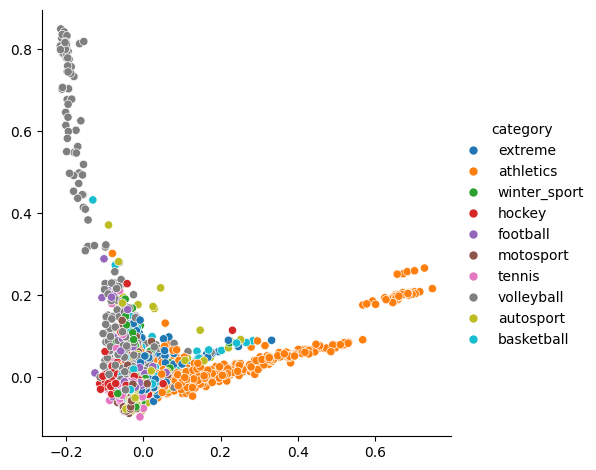

In [32]:
from cProfile import label
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

le = LabelEncoder()
classes_transformed = le.fit_transform(train['category'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tf_idf_matrix)
fig = plt.figure(figsize=(8,5))
sns.relplot(x=X_pca[:,0], y= X_pca[:, 1], hue=train['category'])
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.00749912, 0.00652926])

# Эмбеддинги текстов

## Архитектура word2vec

TF-IDF строится  на конкретном корпусе документов и для каждого токена словаря оценивает его частотность. Например, получив значение tf-idf = 0.13 для токена «компьютер», мы не сможем составить представление о языке в целом или значении слова — только о его типичности для конкретного корпуса текстов.

Авторы Word2Vec предлагают иной подход — для каждого слова они обучают вектор размерности N.

[Лучшие результаты получались для N=100-300] 

Обучают таким образом, что результирующие векторы (эмбеддинги) начинают кодировать смысл слова. В результате все слова из словаря модели переводятся в одно числовое пространство и приобретают свойство векторов из линейной алгебры: похожие векторы находятся ближе друг к другу и над векторами можно использовать математические операции.

Например, векторы слов «девушка», «девочка», «женщина» близки друг к другу, а «девушка», «дерево» и «отвёртка» — далеки.
Но как заставить модель выучить смысл слов? Для этого авторы предлагают следующий подход:

1. Возьмём предложение.

2. Разобьём его на токены.

3. Пройдёмся по нему скользящим окном, равным 5 токенам.

4. Так составим пары находящихся рядом токенов.
    
5. Далее прибегнем к одной из равнозначных схем:

    - a. CBOW (Continuous-Bag-Of-Words): зная слова в окрестности центрального слова, в окне предскажем центральное слово.

    - b. Skip-gram: зная центральное слово, предскажем слова в окрестности (контекстные слова).

```text
tokens = [..., "том", "сойер", "красил", "забор", "тёти", ...]

# CBOW - складываем эмбеддинги соседних слов и предсказываем центральное
("том" + "сойер" + "забор" + "тёти") -> "красил"

# Skip-gram - по центральному слову предсказываем соседей (контекстных слов)
"красил" -> "том"
"красил" -> "сойер"
"красил" -> "забор"
"красил" -> "тёти"
```

Обучая Word2Vec, мы решаем задачу классификации в обоих случаях.

Чтобы модель смогла выучить качественные эмбеддинги слов, её тренируют на корпусе текстов из 6 миллиардов токенов. Звучит впечатляюще, но по сегодняшним меркам это довольно маленькое число для языковых моделей. 

Так модель увидит много примеров из языка, выучит представления токенов и свяжет их в векторном пространстве эмбеддингов.

Вот простая реализация модели Word2Vec-Skip-Gram и её обучение на PyTorch:

```py

import torch
import torch.nn as nn


class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        # Слой эмбеддингов, преобразуем индексы слов в векторы
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        # Линейный слой для предсказания контекстных слов
        self.linear = nn.Linear(embedding_dim, vocab_size)
        
    def forward(self, inputs):
        # Получаем embedding для входных слов
        embeds = self.embeddings(inputs)  # (batch_size, embedding_dim)
        
        # Преобразуем в предсказания для словаря
        out = self.linear(embeds)  # (batch_size, vocab_size)
        return out

model = SkipGram(vocab_size, embedding_dim=300)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(..):
    for target, context in dataset:
        # Преобразуем слова в индексы
        target_idx = word_to_idx[target]
        context_idx = word_to_idx[context]
        
        # Обнуляем градиенты
        optimizer.zero_grad()
        
        # Forward pass
        output = model(torch.tensor([target_idx]))
        
        # Вычисляем loss
        loss = criterion(output, torch.tensor([context_idx]))
        
        # Backward pass
        loss.backward()
        optimizer.step()
```

Модель состоит из:

1. Обучаемой таблицы с векторами слов, nn.Embedding, в начале инициализированной случайно с параметрами:
    - vocab_size — число токенов в словаре;
    
    - embedding_dim — размерность эмбеддинга слова.
    
2. Линейного слоя, nn.Linear, предсказывающего контекстные слова.

Датасет для обучения состоит из пар токенов: центральное target + контекстное слово, context, выбранное из скользящего окна. Каждому токену заранее присвоен свой уникальный индекс, к которому мы можем обратиться через отдельный словарь, word_to_idx. Алгоритм обучения:

- На вход модели подаётся индекс центрального слова, target.
    
- Из матрицы эмбеддингов по индексу получаем вектор target.
    
- С помощью линейного слоя проецируем вектор target в логиты для каждого слова из словаря.
    
- Вычисляем классификационную функцию потерь criterion.

- Делаем обратное распространение ошибки, в результате в nn.Embedding обновляется только вектор целевого слова.
    
- Вся обработка выполняется по батчам, равным batch_size.

В итоге Word2Vec обучается на большом объёме текстовых данных и моделирует совместную встречаемость слов в языке. Благодаря этому он выучивает осмысленные векторы для каждого слова. Самым ценным для нас после обучения в модели является матрица эмбеддингов слов — её мы и будем использовать в дальнейшем.

Embedding слой учится через обычный градиентный спуск, но с особенностями:

- Каждое слово — это строка в матрице параметров

- Градиенты приходят от последующих слоев (LSTM, Linear, и т.д.)

- Обновляются только те embedding, которые были использованы в текущем батче

- Слова с похожим значением/контекстом получают похожие векторы

- Процесс обучения — это "упаковка" семантической информации в dense векторы

Это позволяет модели не только "запоминать" слова, но и выявлять семантические связи между ними, что критически важно для понимания языка.

- Embedding матрица — это просто хранилище векторов, lookup-таблица

- Близость векторов определяется косинусным расстоянием, но сама модель НЕ вычисляет ее явно

- Модель использует близость неявно — линейные слои реагируют на похожие векторы похожим образом

- Обучение сближает векторы через градиенты от целевой задачи

- На инференсе мы просто берем векторы и пропускаем через обученные слои

Аналогия: Представьте, что embedding — это библиотека книг (слов), где похожие книги стоят рядом. Читатель (линейный слой) научился: если берет книги с полки "фантастика" — ставит оценку 5, с полки "учебники" — оценку 2. Ему не нужно каждый раз проверять все книги — он знает, что на полке "фантастика" все книги похожие, и ставит им высокие оценки.

**Полный пайплайн предобработки:**
```text
Исходный текст
     ↓
Очистка (очистка от HTML, спецсимволов и т.д.)
     ↓
Токенизация (разбиение на слова/токены)
     ↓
Нормализация (нижний регистр, стемминг/лемматизация)
     ↓
Фильтрация (стоп-слова, цифры, редкие слова)
     ↓
Построение словаря (vocabulary)
     ↓
Преобразование в индексы (НЕ label encoding!) (bert или ручной словарь)
     ↓
Паддинг до одинаковой длины
     ↓
Создание батчей
     ↓
Подача в nn.Embedding
```

## Word2Vec на практике

Существуют предобученные модели архитектуры Word2Vec. Популярная библиотека для их применения — gensim. 

Конечным результатом Word2Vec является получение матрицы эмбеддингов слов. 

Используем предобученную матрицу для английского языка word2vec-google-news-300, где 300 — это размерность векторов слов, и выполним несколько операций над текстами.

In [1]:
from gensim.models import KeyedVectors
from ml_dl_experiments import settings

# укажем путь к предзагруженной матрице
word2vec_path = settings.SOURCE_PATH + 'ml_dl/models/word2vec-google-news-300.gz'

# загружаем веса
w2v = KeyedVectors.load_word2vec_format(word2vec_path, binary=True) 

Векторы из Word2Vec находятся в одном векторном пространстве и обладают свойствами векторов из линейной алгебры. Найдём ближайших соседей слова "mother", используем метод most_similar:

In [2]:
w2v.most_similar("mother", topn=5)

[('daughter', 0.8706234097480774),
 ('grandmother', 0.8442240953445435),
 ('aunt', 0.843592643737793),
 ('niece', 0.807008683681488),
 ('father', 0.7901482582092285)]

Во время работы с векторами нам также открывается возможность их сложения и вычитания. Таким образом, мы можем перейти от одного слова к другому. Используя атрибуты positive и negative из метода most_similar, можно складывать и вычитать векторы слов соответственно.

In [3]:
result = w2v.most_similar(
    positive=['fairy', 'woman'],
    negative=['magic'],
    topn=1
)
result

[('girl', 0.6413795351982117)]

Эмбеддинги слов — это занимательно, но как быть с целыми предложениями? Очень просто — давайте усредним эмбеддинги слов. В итоге вектор предложения будет равен среднему вектору всех слов, входящих в него.

Напишем функцию `get_sentence_embedding`, которая принимает на вход набор токенов и инициализированную модель `w2v_model`, получает эмбеддинги токенов и возвращает их среднее значение. Сравним полученную косинусную близость двух пар предложений.

In [6]:
from gensim.models import KeyedVectors
import numpy as np
from scipy.spatial.distance import cosine

# укажем путь к предзагруженной матрице
word2vec_path = settings.SOURCE_PATH + 'ml_dl/models/word2vec-google-news-300.gz'

# загружаем веса
w2v = KeyedVectors.load_word2vec_format(word2vec_path, binary=True) 

def get_sentence_embedding(tokens, w2v_model):
    embeddings = [w2v_model.get_vector(token) for token in tokens]
    return np.mean(embeddings, axis=0)

  
tokens_A = ["data", "scientists", "are", "cool"]
tokens_B = ["data", "science", "is", "awesome"]
tokens_C = ["clouds", "in", "the", "sky"]
emb_A = get_sentence_embedding(tokens_A, w2v)
emb_B = get_sentence_embedding(tokens_B, w2v)
emb_C = get_sentence_embedding(tokens_C, w2v)

1 - cosine(emb_A, emb_B), 1 - cosine(emb_A, emb_C)

(np.float32(0.6774102), np.float32(0.31979465))

Есть и минусы. Модель не умеет работать с `OOV` — `Out of Vocabulary`, словами, не встречающимися в словаре. 

И тут дело не только в языке: даже на подходящем для модели языке можно встретить OOV слово. Например, это может быть новый научный термин, которого не существовало в момент обучения. Или просто какая-то странная ошибка или опечатка. Пока мы остаёмся в рамках словаря — всё работает как надо. Когда получаем OOV слово — остаётся только пропустить его. 

Кроме того, складывая векторы слов из длинных предложений, мы всё больше усредняем их смысловое значение — и в итоге теряем детали всего предложения. Архитектурно все наши векторы слов обучаются независимо, и нет какого-то механизма учёта их взаимного расположения и контекстной связи.

# FastText для векторного представления текстов.

## FastText: различия и сходство с Word2Vec

Word2Veс состоит из двух компонентов:

- Обучаемая таблица с векторами токенов заданной длины.
    
- Линейный слой, предсказывающий центральный и контекстные токены.

Обучается Word2Vec в одном из двух сценариев: 

- CBOW — зная токены в окрестности центрального токена, предсказываем центральный.
    
- Skip-gram — зная центральный токен, предсказываем контекстные для него.

Модель `FastText` не приносит в это ничего принципиально нового, 

но если в `Word2Vec` обучаются векторы для целых слов, то в `FastText` словарь состоит как из слов, так и отдельных токенов.

```text

# примеры из словаря Word2Vec
мама
гараж
...

# примеры из словаря FastText
мама
Мама
мамуся
ма
гараж
га
Га
... 
```

Размер словаря в `FastText` намного больше, и для одного слова может встретиться больше похожих вариантов и написаний.

`FastText` разбивает слова на n-gram'ы и усредняет их значения. 
Вот как это происходит:

1. Для каждого слова получают все n-gram'ы. Допустимый символьный размер n-gram для вычисления задаётся в изначальных настройках модели при обучении.
   
2. Для всех найденных n-gram извлекают соответствующий эмбеддинг.
   
3. Векторы n-gram усредняются, и результирующий вектор возвращается для текущего слова, в том числе для OOV.

На самом деле по факту всё чуть сложнее — под капотом у FastText дополнительно применяются более тонкие манипуляции с текстовыми данными, позволяющие не получать ошибку при встрече OOV слов. Они включают в себя использование байтов и хеширование.

## FastText в gensim

In [5]:
from gensim.models import FastText

from ml_dl_experiments import settings

fasttest_path = settings.SOURCE_PATH + "ml_dl/models/fastext.ru.300.bin.gz"
model = FastText.load_fasttext_format(fasttest_path)

model.wv.most_similar("ученый", topn=5)

/tmp/ipykernel_33015/562771766.py:6: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = FastText.load_fasttext_format(fasttest_path)


[('учёный', 0.8264108300209045),
 ('ученый-', 0.7683414816856384),
 ('физик', 0.7575342655181885),
 ('ученый-исследователь', 0.7514362335205078),
 ('исследователь', 0.7409577369689941)]

По аналогии с Word2Vec можно строить эмбеддинги предложений и в FastText. Для этого используется встроенный метод wv.get_sentence_vector, который работает с токенизированными предложениями:

```py
model.wv.get_sentence_vector(tokens)
```

In [8]:

text = "FastText - это 'быстрый текст'"

vec =  model.wv.get_sentence_vector(text.split(" "))
vec.shape

(300,)

Имитируем ситуацию OOV:

In [9]:
model.wv.most_similar("лаборантишка", topn=3)

[('фельдшер-лаборант', 0.5517426133155823),
 ('врача-лаборанта', 0.49968117475509644),
 ('рентгенолаборант', 0.48822319507598877)]

Разбивая исходное слово на n-gram’ы и вычисляя средний вектор слова, FastText подобрал верных соседей — смысл слов корректно закодирован в этих векторах.

Рассмотрим ситуацию с опечаткой:

In [11]:
model.wv.most_similar("ученный", topn=3)

[('ученый', 0.6984712481498718),
 ('ученый-', 0.6187155246734619),
 ('учёный', 0.6084155440330505)]

А если ошибка в другой букве, например в гласной:

In [12]:
model.wv.most_similar("учееный", topn=3)

[('сидрШотландский', 0.48329323530197144),
 ('Холистический', 0.47917088866233826),
 ('ечный', 0.4791232943534851)]

Модели эмбеддингов слов по типу Word2Vec/FastText не могут адекватно обрабатывать случаи с опечатками. Для них, как правило, требуется предварительное применение разных техник проверки орфографии входных текстов.

В реализации FastText в gensim также есть возможности, позволяющие оценить согласованность векторов слов. Делается это с помощью метода  wv.doesnt_match():

In [13]:
text = "data science это good"
model.wv.doesnt_match(text.split(" "))

'это'

В результате мы получаем слово, наиболее отличающееся от остальных.

Обратим слабость FastText в его силу. 

Дано предложение text с опечаткой. Используя встроенные средства библиотеки gensim, найдем и выведим слово, содержащее опечатку, с помощью уже инициализированной модели model.

In [14]:
text = "наука помогает решать сложные задачм"
model.wv.doesnt_match(text.split(" "))

'задачм'

## FastText в наше время

На сегодняшний день Word2Vec/FastText почти не используются. Современные трансформерные архитектуры вытеснили их, так как кардинально качественнее решают задачи. Кроме того, на GPU всё считается быстрее, а это тоже сыграло роль в популярности трансформеров.

Изредка FastText ещё используют. В основном в двух случаях:

- Быстрое прототипирование идеи без обучения и применения тяжёлых моделей.
    
- Отсутствие GPU для решения с помощью трансформеров. FastText можно эффективно использовать на CPU-only системах — правда, потребуется сжатие размера словаря, если важен очень быстрый ответ при ограниченных ресурсах.